In [2]:
import pandas as pd
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
from sklearn import svm
import matplotlib.pyplot as plt
from Haldane_anis_supervise_class import *
from partial import *

In [3]:
clf = svm.SVC(kernel='precomputed')
kernel_train = kernel_partial_train
kernel_test = kernel_partial_test
y = dataset[0][1]
clf.fit(kernel_train, y) 
y_pred = clf.predict(kernel_test)
plt.imshow(y_pred.reshape(40,40))
plt.savefig(f'result for DMRG states with L={L} and bond dimension ={bond}.png')
plt.show()

NameError: name 'kernel_partial_train' is not defined

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define ranges for E and D
E = np.arange(-2, 2, 0.1)
D = np.arange(-2, 2, 0.1)

# Lists to store points and targets
lst_points = []
lst_target = []

# Loop through E and D and classify points
for e in E:
    if 0.8 < e < 2:
        lst_points.append([-2, e])
        lst_target.append(1)  # 'large_ex'
    elif -0.8 < e < 0.8:
        lst_points.append([-2, e])
        lst_target.append(3)  # 'z_neel'
    elif -2 < e < -0.8:
        lst_points.append([-2, e])
        lst_target.append(2)  # 'large_ey'


for e in E:
    if -2 < e < -0.4:
        lst_points.append([2, e])
        lst_target.append(4)  # 'x_neel'
    elif -0.4 < e < 0.4:
        lst_points.append([2, e])
        lst_target.append(5)  # 'large_d'
    elif 0.4 < e < 2.0:
        lst_points.append([2.0, e])
        lst_target.append(6)  # 'y_neel'


for d in D:
    if -2 < d < 0.2:
        lst_points.append([d, 2])
        lst_target.append(1)  # 'large_ex'
    elif 0.2 < d < 2.0:
        lst_points.append([d, 2.0])
        lst_target.append(6)  # 'y_neel'

for d in D:
    if -2 < d < 0.2:
        lst_points.append([d, -2])
        lst_target.append(2)  # 'large_ey'
    elif 0.2 < d < 2.0:
        lst_points.append([d, -2])
        lst_target.append(4)  # 'x_neel'

for d in np.arange(-2, -0.5, 0.1):  # Added step size 0.1
    lst_points.append([d, 0.0])
    lst_target.append(3) 

for d in np.arange(1.3, 2, 0.1):
    lst_points.append([d, 0.0])
    lst_target.append(5)  # 'large_d'

for d in np.arange(-0.2, 0.6, 0.1):
    lst_points.append([d, 0.0])
    lst_target.append(7) #'Haldane'


poi = np.array(lst_points)
targets = np.array(lst_target)


In [5]:
data = pd.read_csv('../original_phase_diagram.csv')
points = data.drop_duplicates()
points = points.dropna()
points = points.reset_index(drop=True)

drop_idx_1 = [86,88]
for i, point in points.iterrows():
    if point[0]>-0.3:
        drop_idx_1.append(i)
    elif point[1]>0.825081:
        drop_idx_1.append(i)
    elif point[1]<-0.825081:
        drop_idx_1.append(i)
first_part = points.drop(drop_idx_1)
first_part = first_part.sort_values('y')
lst_1 = first_part.index.to_list()

drop_idx_2 = []
drop_idx_2.extend(lst_1)
for i, point in points.iterrows():
    if point[0]>1 or point[0]<-1:
        drop_idx_2.append(i)
drop_idx_2.remove(120)
drop_idx_2.remove(122)
second_part = points.drop(drop_idx_2)
second_part = second_part.sort_values('y')
lst_2 = second_part.index.to_list()

drop_idx_3 =[]
for i, point in points.iterrows():
    if point[0]<0.7:
        drop_idx_3.append(i)
third_part = points.drop(drop_idx_3)
third_part = third_part.sort_values('y')


/tmp/ipykernel_12858/528293740.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if point[0]>-0.3:
/tmp/ipykernel_12858/528293740.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif point[1]>0.825081:
/tmp/ipykernel_12858/528293740.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif point[1]<-0.825081:
/tmp/ipykernel_12858/528293740.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a

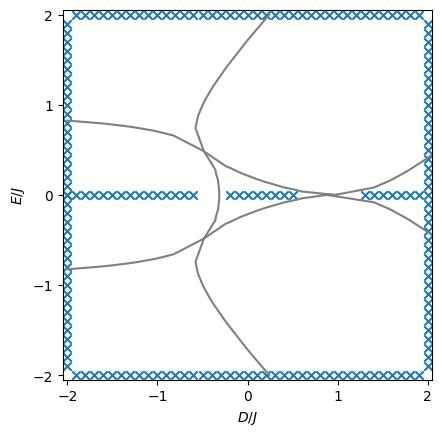

In [6]:
plt.scatter(poi[:, 0], poi[:, 1], marker='x')

plt.xlabel('D')
plt.ylabel('E')
#plt.title('Training Point Distribution')

x1 = first_part['x']
y1 = first_part['y']
plt.plot(x1,y1,'-',color='gray')

x2 = second_part['x']
y2 = second_part['y']
plt.plot(x2, y2, '-', color = 'gray')

x3 = third_part['x']
y3 = third_part['y']
plt.plot(x3, y3, '-', color = 'gray')

plt.axis('square')
plt.xlim(-2.05,2.05),plt.ylim(-2.05,2.05)
plt.xticks([-2,-1,0,1,2]),plt.yticks([-2,-1,0,1,2])
plt.xlabel('$D/J$'),plt.ylabel('$E/J$')
#plt.text(x=-1.5, y=-1.5, s='Large-$E_y$', fontdict={'family': 'serif'})
#plt.text(x = -1.5, y = 0.3, s = '$z$-Néel', fontdict={'family': 'serif'})
#plt.text(x = -1.5, y = 1.5, s = 'Large-$E_x$', fontdict={'family': 'serif'})
#plt.text(x = .7, y = -1.5, s = '$x$-Néel', fontdict={'family': 'serif'})
#plt.text(x = .7, y = 1.5, s = '$y$-Néel', fontdict={'family': 'serif'})
#plt.annotate('Haldane',xy=(-.1,-.1), xytext=(0.8,0.6), arrowprops={'arrowstyle':'->', 'connectionstyle':"angle3,angleA=180,angleB=90"} ,horizontalalignment='center', fontfamily='serif')
#plt.annotate('Large-$D$', xy = (1.7,0), xytext=(.8,-.7), arrowprops={'arrowstyle':'->', 'connectionstyle':"angle3,angleA=180,angleB=90"} ,horizontalalignment='center', fontfamily='serif')

plt.savefig('train_point_distribution.png', dpi=300)
plt.show()

In [7]:
mat = y_pred.reshape(40,40)
r = mat.shape[0]
c = mat.shape[1]
dx = 4/r
dy = 4/c

for j in range(c):
    for i in range(r):
        if mat[j,i] == 1:
            plt.scatter((i*dx)+dx/2,(j*dy)+dy/2,marker = 's', color = 'steelblue',s=320, edgecolors='none')
        elif mat[j,i] == 2:
            plt.scatter((i*dx)+dx/2,(j*dy)+dy/2,marker = 's', color ='lightseagreen',s =320,  edgecolors='none')
        elif mat[j,i] == 3:
            plt.scatter((i*dx)+dx/2,(j*dy)+dy/2,marker = 's', color ='skyblue',s =320,  edgecolors='none')
        elif mat[j,i] == 4:
            plt.scatter((i*dx)+dx/2,(j*dy)+dy/2,marker = 's', color ='yellowgreen',s =320,  edgecolors='none')
        elif mat[j,i] == 5:
            plt.scatter((i*dx)+dx/2,(j*dy)+dy/2,marker = 's', color ='seagreen',s =320,  edgecolors='none')
        elif mat[j,i] == 6:
            plt.scatter((i*dx)+dx/2,(j*dy)+dy/2,marker = 's', color ='cadetblue',s =320,  edgecolors='none')
        elif mat[j,i] == 0:
            plt.scatter((i*dx)+dx/2,(j*dy)+dy/2,marker = 's', color ='gold',s =320,  edgecolors='none')

x1 = first_part['x']+2
y1 = first_part['y']+2
plt.plot(x1,y1,'-',color='black', alpha = 0.5)

x2 = second_part['x']+2
y2 = second_part['y']+2
plt.plot(x2, y2, '-', color = 'black', alpha = 0.5)

x3 = third_part['x']+2
y3 = third_part['y']+2
plt.plot(x3, y3, '-', color = 'black', alpha = 0.5)

plt.axis('square')
plt.xlim([-0.04,4.04])
plt.ylim([-0.04,4.04])
plt.xticks([0,1,2,3,4],[-2,-1,0,1,2])
plt.yticks([0,1,2,3,4],[-2,-1,0,1,2])

plt.xlabel('$D/J$')
plt.ylabel('$E/J$')
plt.savefig('anisotropic_Haldan_svm.png')
plt.show()


NameError: name 'y_pred' is not defined

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define ranges for E and D
E = np.arange(-2, 2, 0.1)
D = np.arange(-2, 2, 0.1)

# Lists to store points and targets
lst_points = []
lst_target = []

# Loop through E and D and classify points
for e in E:
    if 0.8 < e < 2:
        lst_points.append([-2, e])
        lst_target.append(1)  # 'large_ex'
    elif -0.8 < e < 0.8:
        lst_points.append([-2, e])
        lst_target.append(3)  # 'z_neel'
    elif -2 < e < -0.8:
        lst_points.append([-2, e])
        lst_target.append(2)  # 'large_ey'


for e in E:
    if -2 < e < -0.4:
        lst_points.append([2, e])
        lst_target.append(4)  # 'x_neel'
    elif -0.4 < e < 0.4:
        lst_points.append([2, e])
        lst_target.append(5)  # 'large_d'
    elif 0.4 < e < 2.0:
        lst_points.append([2.0, e])
        lst_target.append(6)  # 'y_neel'


for d in D:
    if -2 < d < 0.2:
        lst_points.append([d, 2])
        lst_target.append(1)  # 'large_ex'
    elif 0.2 < d < 2.0:
        lst_points.append([d, 2.0])
        lst_target.append(6)  # 'y_neel'

for d in D:
    if -2 < d < 0.2:
        lst_points.append([d, -2])
        lst_target.append(2)  # 'large_ey'
    elif 0.2 < d < 2.0:
        lst_points.append([d, -2])
        lst_target.append(4)  # 'x_neel'

for d in np.arange(-2, -0.5, 0.1):  # Added step size 0.1
    lst_points.append([d, 0.0])
    lst_target.append(3) 

for d in np.arange(0.9, 2, 0.1):
    lst_points.append([d, 0.0])
    lst_target.append(5)  # 'large_d'

for d in np.arange(-0.2, 0.6, 0.1):
    lst_points.append([d, 0.0])
    lst_target.append(7) #'Haldane'


points = np.array(lst_points)
targets = np.array(lst_target)


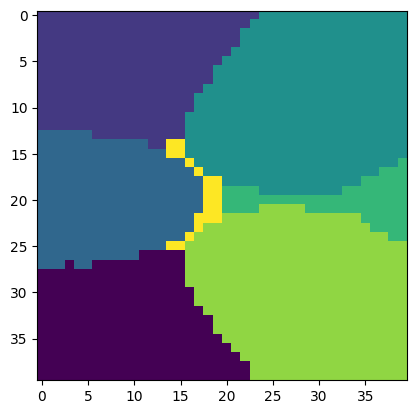

In [26]:

path = f"./dataset_L=51_bond=50_partial(keeping 1 sites)"
file_path_kernel_train_DMRG= os.path.join(path, "kernel_train_Haldane_DMRG_partial_1spins.hdf5")
file_path_kernel_test_DMRG= os.path.join(path, "kernel_test_Haldane_DMRG_partial_1spins.hdf5")


with h5py.File(file_path_kernel_train_DMRG, "r") as f:
    kernel_train = f["gram_train_DMRG_partial"][:] 

with h5py.File(file_path_kernel_test_DMRG, "r") as f:
    kernel_test = f["gram_test_DMRG_partial"][:] 

clf = svm.SVC(kernel='precomputed')
y = targets
clf.fit(kernel_train, y) 
y_pred = clf.predict(kernel_test)
plt.imshow(y_pred.reshape(40,40))


plt.savefig(f'keep 1 sites.png')
plt.show()

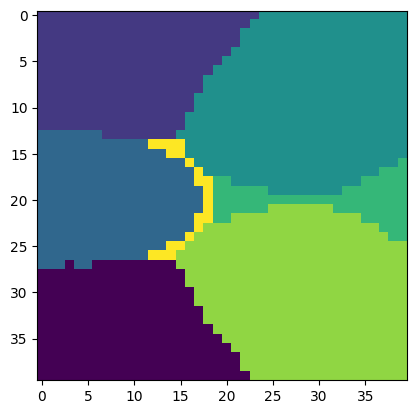

In [24]:

path = f"./dataset_L=51_bond=50_partial(keeping 2 sites)"
file_path_kernel_train_DMRG= os.path.join(path, "kernel_train_Haldane_DMRG_partial_2spins.hdf5")
file_path_kernel_test_DMRG= os.path.join(path, "kernel_test_Haldane_DMRG_partial_2spins.hdf5")


with h5py.File(file_path_kernel_train_DMRG, "r") as f:
    kernel_train = f["gram_train_DMRG_partial"][:] 

with h5py.File(file_path_kernel_test_DMRG, "r") as f:
    kernel_test = f["gram_test_DMRG_partial"][:] 

clf = svm.SVC(kernel='precomputed')
y = targets
clf.fit(kernel_train, y) 
y_pred = clf.predict(kernel_test)
plt.imshow(y_pred.reshape(40,40))


plt.savefig(f'keep 2 sites.png')
plt.show()

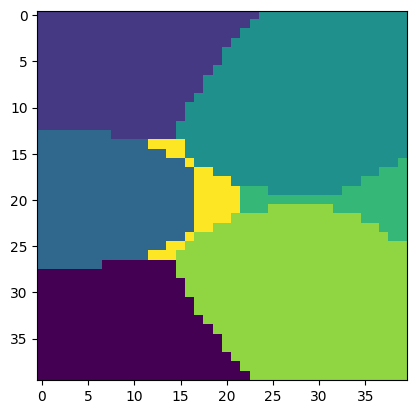

In [18]:

path = f"./dataset_L=51_bond=50_partial(keeping 3 sites)"
file_path_kernel_train_DMRG= os.path.join(path, "kernel_train_Haldane_DMRG_partial_3spins.hdf5")
file_path_kernel_test_DMRG= os.path.join(path, "kernel_test_Haldane_DMRG_partial_3spins.hdf5")


with h5py.File(file_path_kernel_train_DMRG, "r") as f:
    kernel_train = f["gram_train_DMRG_partial"][:] 

with h5py.File(file_path_kernel_test_DMRG, "r") as f:
    kernel_test = f["gram_test_DMRG_partial"][:] 

clf = svm.SVC(kernel='precomputed')
y = targets
clf.fit(kernel_train, y) 
y_pred = clf.predict(kernel_test)
plt.imshow(y_pred.reshape(40,40))


plt.savefig(f'keep 3 sites.png')
plt.show()

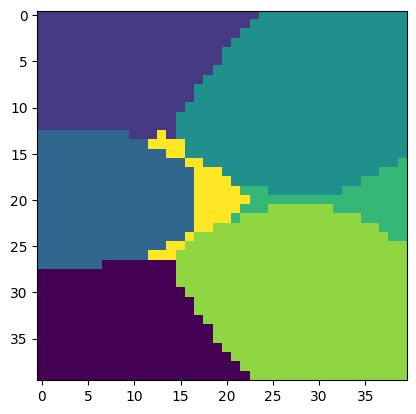

In [16]:

path = f"./dataset_L=51_bond=50_partial(keeping 4 sites)"
file_path_kernel_train_DMRG= os.path.join(path, "kernel_train_Haldane_DMRG_partial_4spins.hdf5")
file_path_kernel_test_DMRG= os.path.join(path, "kernel_test_Haldane_DMRG_partial_4spins.hdf5")


with h5py.File(file_path_kernel_train_DMRG, "r") as f:
    kernel_train = f["gram_train_DMRG_partial"][:] 

with h5py.File(file_path_kernel_test_DMRG, "r") as f:
    kernel_test = f["gram_test_DMRG_partial"][:] 

clf = svm.SVC(kernel='precomputed')
y = targets
clf.fit(kernel_train, y) 
y_pred = clf.predict(kernel_test)
plt.imshow(y_pred.reshape(40,40))


plt.savefig(f'keep 4 sites.png')
plt.show()

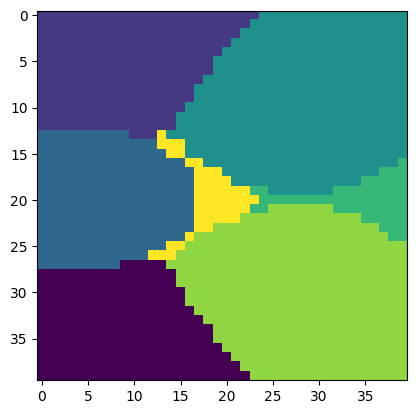

In [13]:

path = f"./dataset_L=51_bond=50_partial(keeping 5 sites)"
file_path_kernel_train_DMRG= os.path.join(path, "kernel_train_Haldane_DMRG_partial_5spins.hdf5")
file_path_kernel_test_DMRG= os.path.join(path, "kernel_test_Haldane_DMRG_partial_5spins.hdf5")


with h5py.File(file_path_kernel_train_DMRG, "r") as f:
    kernel_train = f["gram_train_DMRG_partial"][:] 

with h5py.File(file_path_kernel_test_DMRG, "r") as f:
    kernel_test = f["gram_test_DMRG_partial"][:] 

clf = svm.SVC(kernel='precomputed')
y = targets
clf.fit(kernel_train, y) 
y_pred = clf.predict(kernel_test)
plt.imshow(y_pred.reshape(40,40))


plt.savefig(f'keep 5 sites.png')
plt.show()

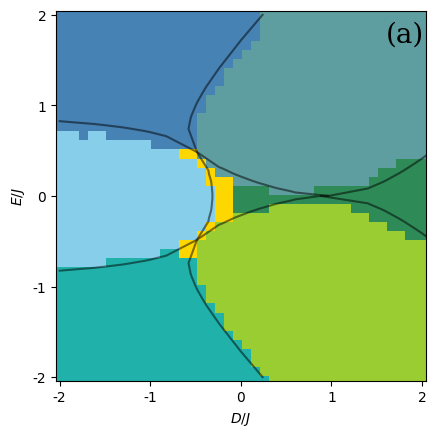

In [23]:

mat = y_pred.reshape(40,40)
r = mat.shape[0]
c = mat.shape[1]
dx = 4/r
dy = 4/c

for j in range(c):
    for i in range(r):
        if mat[j,i] == 1:
            plt.scatter((i*dx)+dx/2,(j*dy)+dy/2,marker = 's', color = 'steelblue',s=320, edgecolors='none')
        elif mat[j,i] == 2:
            plt.scatter((i*dx)+dx/2,(j*dy)+dy/2,marker = 's', color ='lightseagreen',s =320,  edgecolors='none')
        elif mat[j,i] == 3:
            plt.scatter((i*dx)+dx/2,(j*dy)+dy/2,marker = 's', color ='skyblue',s =320,  edgecolors='none')
        elif mat[j,i] == 4:
            plt.scatter((i*dx)+dx/2,(j*dy)+dy/2,marker = 's', color ='yellowgreen',s =320,  edgecolors='none')
        elif mat[j,i] == 5:
            plt.scatter((i*dx)+dx/2,(j*dy)+dy/2,marker = 's', color ='seagreen',s =320,  edgecolors='none')
        elif mat[j,i] == 6:
            plt.scatter((i*dx)+dx/2,(j*dy)+dy/2,marker = 's', color ='cadetblue',s =320,  edgecolors='none')
        elif mat[j,i] == 7:
            plt.scatter((i*dx)+dx/2,(j*dy)+dy/2,marker = 's', color ='gold',s =320,  edgecolors='none')

x1 = first_part['x']+2
y1 = first_part['y']+2
plt.plot(x1,y1,'-',color='black', alpha = 0.5)

x2 = second_part['x']+2
y2 = second_part['y']+2
plt.plot(x2, y2, '-', color = 'black', alpha = 0.5)

x3 = third_part['x']+2
y3 = third_part['y']+2
plt.plot(x3, y3, '-', color = 'black', alpha = 0.5)

#plt.scatter(poi[:, 0]+2, poi[:, 1]+2, c='black', marker='x', alpha=0.8, s=20)

plt.axis('square')
plt.xlim([-0.04,4.04])
plt.ylim([-0.04,4.04])
plt.xticks([0,1,2,3,4],[-2,-1,0,1,2])
plt.yticks([0,1,2,3,4],[-2,-1,0,1,2])

plt.xlabel('$D/J$')
plt.ylabel('$E/J$')
plt.text(x=3.6, y=3.7, s='(a)', fontdict={'family': 'serif', 'size': 20})
plt.savefig('keep 1 sites.png')
plt.show()
